In [77]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import uproot
import numpy as np
import awkward as ak

ifile ="/home/submit/lavezzo/SUEP-m1000-generic-1.root"

rf = uproot.open(ifile)

In [78]:
tree = rf['Events']

In [87]:
Jets = ak.zip({
            "pt": tree['Jet_pt'].array(),
            "eta": tree['Jet_eta'].array(),
            "phi": tree['Jet_phi'].array(),
            "mass": tree['Jet_mass'].array(),
            "jetId": tree['Jet_jetId'].array()
        })
jetCut = (Jets.pt > 30) & (abs(Jets.eta)<4.7)
ak4jets = Jets[jetCut]

In [131]:
Cands = ak.zip({
            "pt": tree['PFCands_pt'].array(),
            "eta": tree['PFCands_eta'].array(),
            "phi": tree['PFCands_phi'].array(),
            "mass": tree['PFCands_mass'].array()
        }, with_name="Momentum4D")        
cut = (tree['PFCands_fromPV'].array() > 1) & \
        (tree['PFCands_pt'].array() >= 0.7) & \
        (abs(tree['PFCands_eta'].array()) <= 2.5) & \
        (abs(tree['PFCands_dz'].array()) < 10) & \
        (tree['PFCands_dzErr'].array() < 0.05)
Cleaned_cands = Cands[cut]
Cleaned_cands = ak.packed(Cleaned_cands)

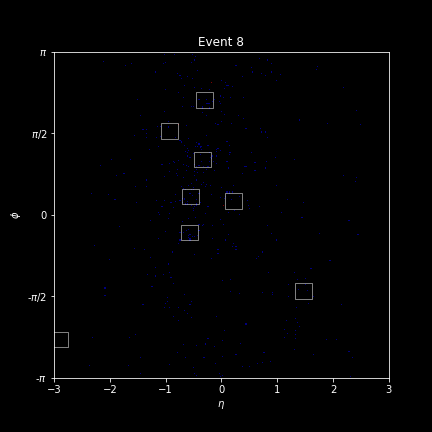

In [150]:
%matplotlib widget
plt.style.use('dark_background')

iEvent = 8          # which event to plot
nbins = 300         # how many bins for eta, phi
size = 0.3          # size of jets' boxes

bins_eta = np.linspace(-3,3,nbins)
bins_phi = np.linspace(-np.pi, np.pi, nbins)
fig = plt.figure(figsize=(6,6))
ax = plt.subplot()
ax.set_title("Event " + str(iEvent))
_ = ax.hist2d(Cleaned_cands.eta[iEvent], Cleaned_cands.phi[iEvent], 
              #cmap='plasma', 
              cmap='jet', 
              bins=[bins_eta,bins_phi], 
              cmin=0.0000001)
for jet in ak4jets[iEvent]:
    s = patches.Rectangle((jet.eta-size/2, jet.phi-size/2),
                                   size,
                                   size,
                                   linewidth=0.5,
                                   edgecolor='white',
                                   facecolor='none')
    ax.add_patch(s)
ax.set_xlim(-3,3)
ax.set_xlabel(r"$\eta$")
ax.set_ylim(-np.pi, np.pi)
ax.set_ylabel(r"$\phi$")
ax.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
_ = ax.set_yticklabels([r"-$\pi$", r"-$\pi$/2", "0", r"$\pi$/2", r"$\pi$"])